By Alex Dance
https://www.linkedin.com/in/alex-dance/

## Written digits classification with Keras

In [2]:
! pip install keras.models

  Created wheel for pathlib: filename=pathlib-1.0.1-py3-none-any.whl size=14353 sha256=eba58524d32fdbc2ed99754ae34d70a94750967cebd503d254cbb8c030417400
  Stored in directory: c:\users\alexd\appdata\local\pip\cache\wheels\6e\96\b8\10037fe231e23970bac58361d7c93571ab983a7bbc55e68550
Successfully built pathlib


In [6]:
! pip install tensorflow

  Created wheel for absl-py: filename=absl_py-0.9.0-py3-none-any.whl size=121935 sha256=75d5d666c34935c9d258a0e4ef85cff134e8ee5da0231919dcd7b43cb4f0d783
  Stored in directory: c:\users\alexd\appdata\local\pip\cache\wheels\cc\af\1a\498a24d0730ef484019e007bb9e8cef3ac00311a672c049a3e
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=41c1a321945195ed52e6262d84a1a8fd1b73561958cd059972db2aaa0fc92e9c
  Stored in directory: c:\users\alexd\appdata\local\pip\cache\wheels\3f\e3\ec\8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2
Successfully built absl-py termcolor


In [7]:
## Import libraries
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Using TensorFlow backend.


In [8]:
# The digits dataset
digits = load_digits()

In [9]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

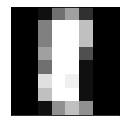

In [10]:
id = np.random.randint(len(digits.target))
plt.figure(figsize = (2, 2))
plt.imshow(digits.images[id], cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [11]:
# Prepare input data
# input
X = digits.data.astype(np.uint8)
n_cols = X.shape[1]

# output
target = digits.target.astype(np.uint8)

# Convert the target to categorical
y = to_categorical(
    target,
    num_classes = len(set(target)),
    dtype = 'uint8')

In [27]:
digits.images[1] # Extra

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [28]:
digits.data # Extra

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.3,
    random_state = 65)

In [13]:
# Set up the model architecture
model = Sequential()

In [14]:
# Add the first hidden layer
model.add(Dense(100, activation = 'relu', input_shape = (n_cols, )))
# Add the second hidden layer
model.add(Dense(50, activation = 'relu'))

# Add the output layer
model.add(Dense(10, activation = 'softmax'))

In [15]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               6500      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 12,060
Trainable params: 12,060
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
# Compile the model
model.compile(
    optimizer = 'sgd',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

In [31]:
%%time
# Fit the model
history = model.fit(
    X_train,
    y_train,
    validation_split = 0.25,
    batch_size = 20,
    epochs = 100,
    verbose = 1)

Train on 942 samples, validate on 315 samples
Epoch 1/100
942/942 [==============================] - 0s 79us/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.1458 - val_accuracy: 0.9683
Epoch 2/100
942/942 [==============================] - 0s 64us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.1469 - val_accuracy: 0.9683
Epoch 3/100
942/942 [==============================] - 0s 67us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.1479 - val_accuracy: 0.9683
Epoch 4/100
942/942 [==============================] - 0s 54us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.1472 - val_accuracy: 0.9683
Epoch 5/100
942/942 [==============================] - 0s 82us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.1516 - val_accuracy: 0.9683
Epoch 6/100
942/942 [==============================] - 0s 65us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.1486 - val_accuracy: 0.9683
Epoch 7/100
942/942 [==============================] - 0s 54us/step - loss: 0.0021 - accur

In [18]:
predictions = model.predict_classes(X_test)

In [19]:
score = model.evaluate(X_test, y_test, batch_size = 315)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

540/540 [==============================] - 0s 11us/step

Test loss: 0.085386, Test accuracy: 0.970370


In [20]:
def print_cm(cm):
    c = '%%%dd ' % len('%d' % cm.max())
    s = ' | '
    s += ''.join([c % i for i in range(len(cm[0]))])
    print(s)
    print('-' * len(s))
    for i, r in enumerate(cm):
        s = '%d| ' % i
        s += c * len(r)
        print(s % tuple(r))

In [21]:
y_test_target = np.array([x.argmax() for x in y_test])
cm = confusion_matrix(y_test_target, predictions)
print_cm(cm)

 |  0  1  2  3  4  5  6  7  8  9 
---------------------------------
0| 54  0  0  0  1  0  0  0  0  0 
1|  0 53  1  0  0  0  0  0  1  0 
2|  0  0 49  0  0  0  0  0  0  0 
3|  0  0  0 51  0  1  0  0  0  0 
4|  0  0  0  0 54  0  1  0  0  0 
5|  0  1  0  0  0 59  0  0  0  0 
6|  0  0  0  0  0  1 60  0  0  0 
7|  0  0  0  0  0  0  0 51  0  1 
8|  0  2  0  0  0  1  1  0 44  1 
9|  0  1  0  0  0  1  0  0  1 49 


In [32]:
model.history.history

{'val_loss': [0.14580712322559622,
  0.14690639687672494,
  0.14792456199961995,
  0.1472287303398526,
  0.15155525892854682,
  0.1485743167263175,
  0.14745229810831093,
  0.14609179116549,
  0.1481459229179318,
  0.14607028201931999,
  0.14936416859309826,
  0.14765259286477453,
  0.14455256126229726,
  0.14648376828029988,
  0.14728686594892115,
  0.14564932977396344,
  0.1560898550919124,
  0.14758240880947265,
  0.14829959578457333,
  0.14722259839375815,
  0.14810762882587455,
  0.14860089868307114,
  0.14810571491363503,
  0.14710072788690765,
  0.14842752358388334,
  0.14771873069306216,
  0.14744499506103614,
  0.14777923168407547,
  0.14714006816465702,
  0.1472225525815572,
  0.15361053440424186,
  0.14925029779237414,
  0.1486239271268012,
  0.1462845126137374,
  0.14815608046889778,
  0.14884120644262386,
  0.14826824468752695,
  0.14784728445940548,
  0.1488570620911935,
  0.14814194253394528,
  0.14999094561097168,
  0.1487399593054775,
  0.1499339776438853,
  0.14767107

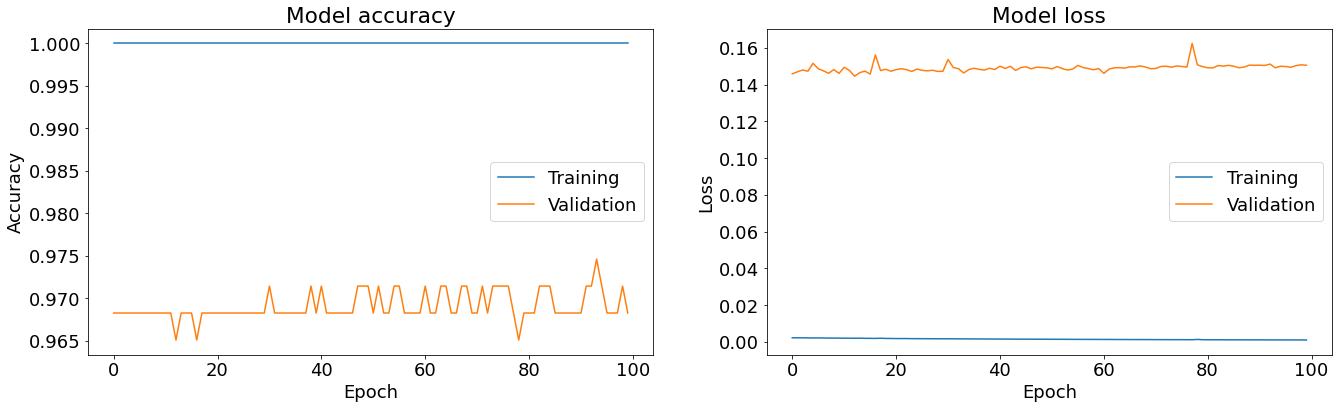

In [34]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(model.history.history['accuracy'], label = 'Training') #['acc'], label = 'Training')
ax[0].plot(model.history.history['val_accuracy'], label = 'Validation')
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(model.history.history['loss'], label = 'Training')
ax[1].plot(model.history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

In [23]:
def show_digit():
    id = np.random.randint(len(predictions))
    XTest = X_test[id].reshape(8, 8)
    plt.figure(figsize = (2, 2))
    plt.imshow(XTest, cmap = 'gray')
    plt.title('Prediction: %d' % predictions[id])
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [24]:
def show_10_digits():
    fig, ax = plt.subplots(2, 5, figsize = (8, 4))
    fig.subplots_adjust(left = 0.02, right = 0.98, top = 0.8, wspace = 0.2, hspace = 0.3)
    fig.suptitle('Ten Predictions', fontsize = 12, fontweight = 'bold')

    plt.rcParams.update({'font.size': 10})
    
    ids = np.random.randint(len(predictions), size = 10)
    r = 0
    c = 0
    for id in ids:
        XTest = X_test[id].reshape(8, 8)

        # original image
        ax[r, c].imshow(XTest, cmap = 'gray')
        ax[r, c].set_title('Prediction: %d' % predictions[id])
        ax[r, c].set_xticks([])
        ax[r, c].set_yticks([])
        c += 1
        if c > 4:
            r += 1
            c = 0

    plt.show()

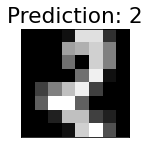

In [25]:
# show one
show_digit()

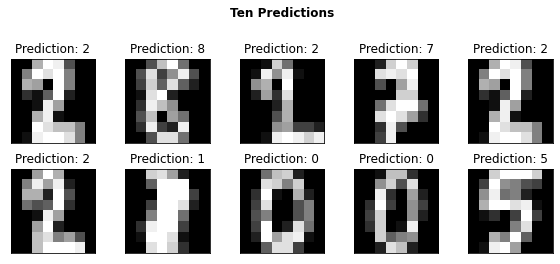

In [26]:
# show ten
show_10_digits()

In [0]:
by Alex Dance